In [3]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns

# print versions of each 
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)

Pandas version: 2.3.3
NumPy version: 2.3.4
Matplotlib version: 3.10.6
Seaborn version: 0.13.2


In [4]:
# display all columns in pd dataframes 
pd.set_option('display.max_columns', None)
# load the dataset 
df = pd.read_csv("processed_data/final_merged_retail_data.csv" )
# display the first few rows of the dataset
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [6]:
# convert the date column to datetime format

df['Date'] = pd.to_datetime(df['Date'] , format='%Y-%m-%d')

In [7]:
df.shape

(421570, 16)

In [8]:
df.describe()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000
std,12.785297,30.492054,NaN,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328


There are some peculiarities in the feature descriptions.

1. Weekly_Sales has a minimum value in negative.In real life scenario , it may be possible if the net returns/refunds exceed the gross sales for a particular week. However , we will investigate this further.

2. Markdown2 and Markdown3 have a minimum value also in negative.Negative values don't make sense for markdowns as markdowns represents the amount by which the original price of a product is reduced. A negative discount does not align with the concept of a markdown. We will investigate this further as well.

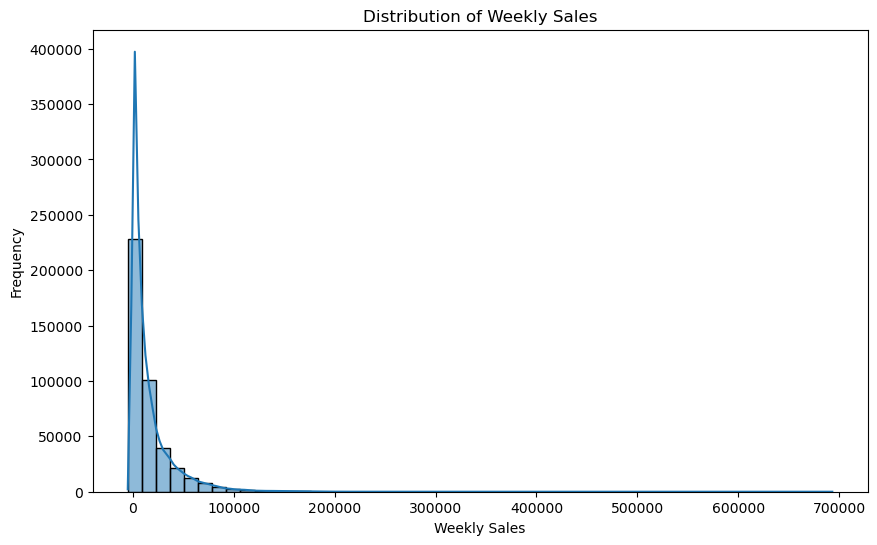

In [9]:
# Plotting the weekly sales distribution 

plt.figure(figsize=(10,6))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title('Distribution of Weekly Sales')   
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

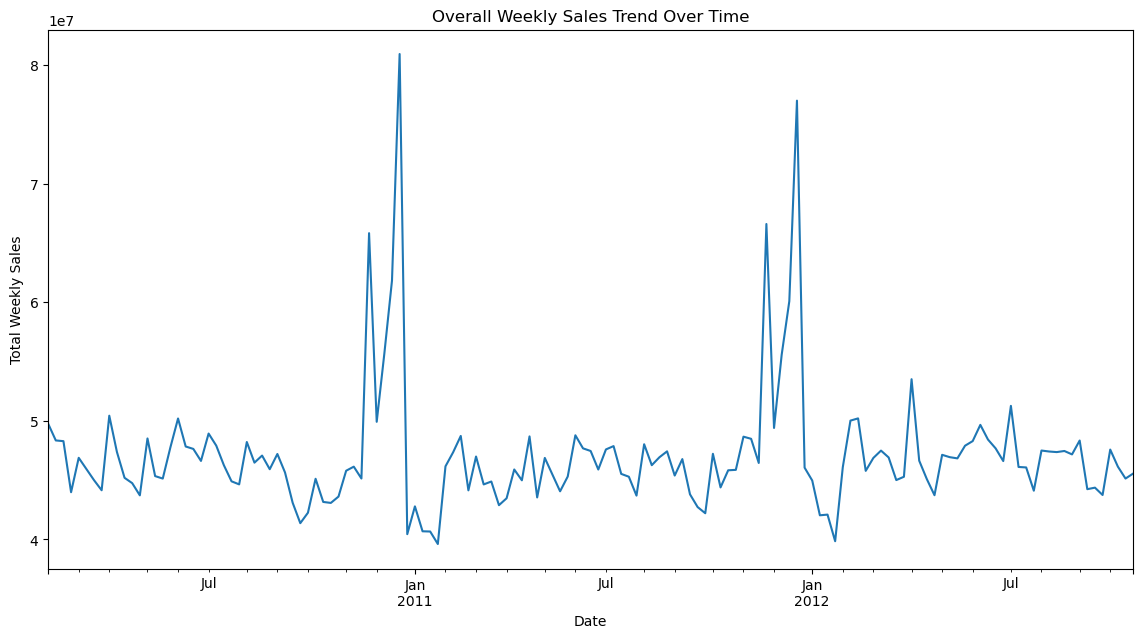

In [10]:
# Overall weekly sales trend over time 

weekly_trend = df.groupby("Date")["Weekly_Sales"].sum()
plt.figure(figsize=(14,7))
weekly_trend.plot()
plt.title("Overall Weekly Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.show()

The Line chart shows that each year there is a sales peak around the end of the year.The sales peak reaches the highest point in the end of 2010 and start of 2011 where the sales exceed 80 lakhs (8 million) at one point.

In [11]:
# Mean Weekly Sales During Holiday Weeks vs Non-Holiday Weeks
holiday_sales = df.groupby('IsHoliday')['Weekly_Sales'].mean()
holiday_sales

IsHoliday
False    15901.445069
True     17035.823187
Name: Weekly_Sales, dtype: float64

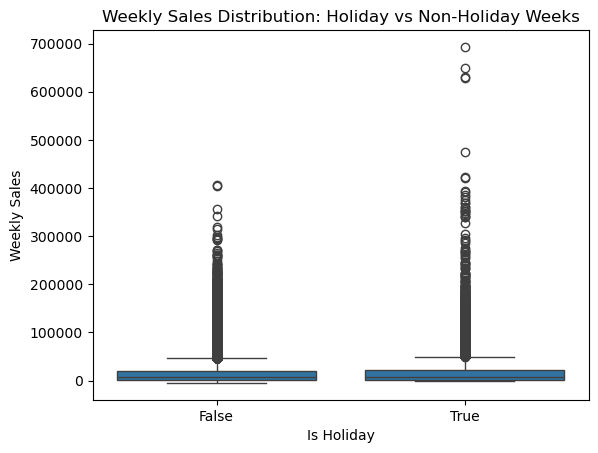

In [12]:
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=df)
plt.title('Weekly Sales Distribution: Holiday vs Non-Holiday Weeks')
plt.xlabel('Is Holiday')
plt.ylabel('Weekly Sales')
plt.show()

Mean Weekly sales during holiday weeks is significantly higher than non-holiday weeks. This indicates that holidays have a positive impact on sales, likely due to increased consumer spending during these periods.

The box plot reveals that though holiday weeks and non holiday weeks have similar median weekly sales values and the IQR ranges are also similar,but in holiday weeks there are more extreme high sales values (outliers) compared to non-holiday weeks. This suggests that while typical sales may be similar, holidays can lead to occasional spikes in sales.

Checking stores and departments behaviour

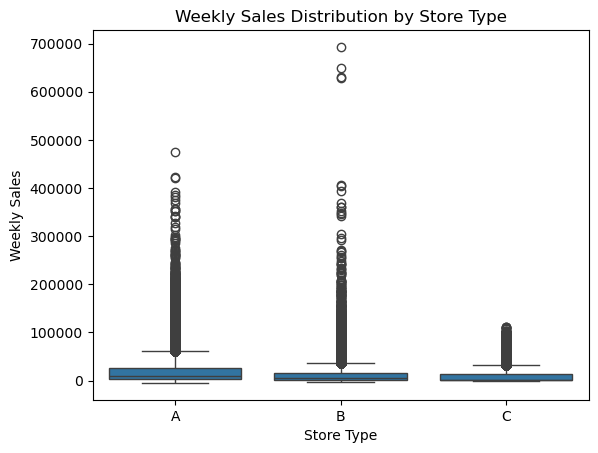

In [14]:
# Store type impact on sales 

sns.boxplot(x='Type', y='Weekly_Sales', data=df)
plt.title('Weekly Sales Distribution by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Weekly Sales')
plt.show()

In [ ]:
# Store type distribution counts
df['Type'].value_counts()

Type
A    215478
B    163495
C     42597
Name: count, dtype: int64

In [ ]:
df.groupby('Type')['Weekly_Sales'].mean()

Type
A    20099.568043
B    12237.075977
C     9519.532538
Name: Weekly_Sales, dtype: float64

In [ ]:
df.groupby('Type')['Weekly_Sales'].sum()

Type
A    4.331015e+09
B    2.000701e+09
C    4.055035e+08
Name: Weekly_Sales, dtype: float64

Mean Weekly sales for Type A stores is significantly higher than Type B and Type C stores.The number of transactions in Type A stores is also significantly higher than Type B and Type C stores. This indicates that Type A stores are more popular among customers, likely due to better product offerings, location, or customer service. The higher sales and transaction counts suggest that Type A stores are more successful in attracting and retaining customers compared to Type B and Type C stores.


The transaction amounts in Type A stores are also significantly higher and the IQR range is wider compared to Type B and Type C store.

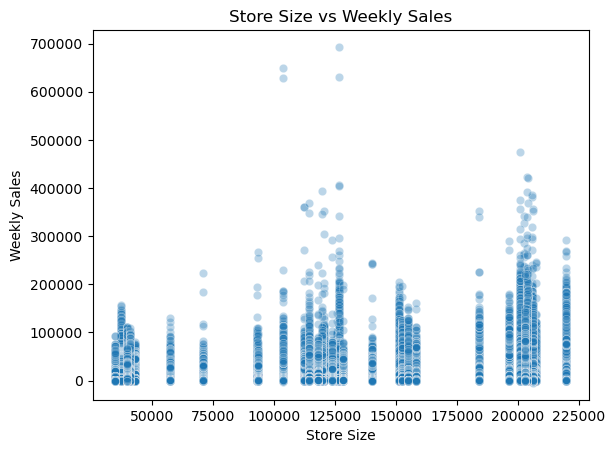

In [ ]:
# Store Size vs Store sales 

sns.scatterplot(x='Size', y='Weekly_Sales', data=df , alpha = 0.3)
plt.title('Store Size vs Weekly Sales')
plt.xlabel('Store Size')
plt.ylabel('Weekly Sales')
plt.show()

In [ ]:
# The mean store size of each store type 
df.groupby('Type')['Size'].mean()

Type
A    182231.285486
B    101818.735827
C     40535.725286
Name: Size, dtype: float64

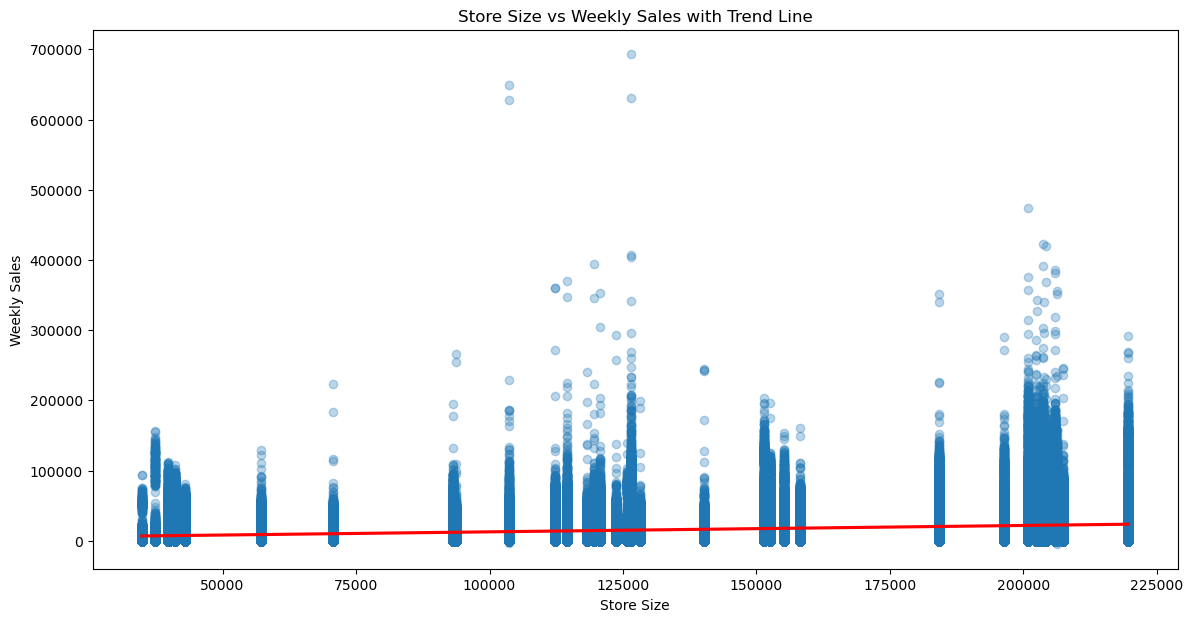

In [ ]:
# getting the trend of weekly sales with respect to store size

plt.figure(figsize=(14,7))
sns.regplot(x="Size", y="Weekly_Sales",\
            data = df , scatter_kws={'alpha':0.3},\
                line_kws={'color':'red'} )

plt.title("Store Size vs Weekly Sales with Trend Line")
plt.xlabel("Store Size")
plt.ylabel("Weekly Sales")
plt.show()

In [ ]:
size_sales_corr = df['Size'].corr(df['Weekly_Sales'])
print(f"Correlation between Store Size and Weekly Sales: {size_sales_corr:.2f}")

Correlation between Store Size and Weekly Sales: 0.24


There is positive but weak linear relationship between store size and weekly sales, with a correlation coefficient of 0.24. This suggests that while larger stores tend to have higher sales, there are likely other factors influencing sales performance as well.

In [ ]:
# Missing Value Handling

df[["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]].isnull().sum()

MarkDown1    270889
MarkDown2    310322
MarkDown3    284479
MarkDown4    286603
MarkDown5    270138
dtype: int64

In [ ]:
df[["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]].isnull().mean()

MarkDown1    0.642572
MarkDown2    0.736110
MarkDown3    0.674808
MarkDown4    0.679847
MarkDown5    0.640790
dtype: float64

We will consider Missing Markdown means no markdown (no discount provide for that category during that week).

In [ ]:
# imputing missing values with 0 (assuming missing markdown means no markdown)

markdown_cols = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]
for col in markdown_cols:
    df[col] = df[col].fillna(0)

df['Has_Markdown'] = (df[markdown_cols].sum(axis=1) > 0).astype(int)

In [ ]:
df["Has_Markdown"].value_counts()

Has_Markdown
0    270138
1    151432
Name: count, dtype: int64

270k+ transactions have no markdowns in any of the 5 markdown categories,while 151K transactions have at least one markdown in one of the 5 markdown categories. This indicates that a significant portion of transactions do not involve any markdowns, while a smaller portion does involve markdowns, which could be an important factor to consider in sales analysis and modeling.

## Feature Engineering 

In [ ]:
# Time features 

df['Date'].min() , df['Date'].max()

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

In [ ]:
df["Week"] = df["Date"].dt.isocalendar().week
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year




In [ ]:
# is weekend or not 

df["Is_Weekend"] = df["Date"].dt.weekday >= 5

# which weekday is it 

df["Weekday"] = df["Date"].dt.weekday

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Has_Markdown,Week,Month,Year,Is_Weekend,Weekday
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,0,5,2,2010,False,4
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,0,6,2,2010,False,4
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,0,7,2,2010,False,4
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,0,8,2,2010,False,4
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,0,9,3,2010,False,4


Each calculation of weekly sales is done on the Weekday 4 (Thursday) of each week.

In [ ]:
df.drop(columns = ["Is_Weekend", "Weekday"], inplace = True)

Sales dynamics (rolling features)

In [ ]:
# Sales dynamics ( rolling features)

df = df.sort_values(["Store", "Dept", "Date"])

df.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Has_Markdown,Week,Month,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,0,5,2,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,0,6,2,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,0,7,2,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,0,8,2,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,0,9,3,2010
5,1,1,2010-03-12,21043.39,False,57.79,2.667,0.0,0.0,0.0,0.0,0.0,211.380643,8.106,A,151315,0,10,3,2010
6,1,1,2010-03-19,22136.64,False,54.58,2.720,0.0,0.0,0.0,0.0,0.0,211.215635,8.106,A,151315,0,11,3,2010
7,1,1,2010-03-26,26229.21,False,51.45,2.732,0.0,0.0,0.0,0.0,0.0,211.018042,8.106,A,151315,0,12,3,2010
8,1,1,2010-04-02,57258.43,False,62.27,2.719,0.0,0.0,0.0,0.0,0.0,210.820450,7.808,A,151315,0,13,4,2010
9,1,1,2010-04-09,42960.91,False,65.86,2.770,0.0,0.0,0.0,0.0,0.0,210.622857,7.808,A,151315,0,14,4,2010


In [ ]:
print(df.loc[(df['Store']==1) & (df["Dept"]==1)].shape[0])
print(df.loc[(df['Store']==1) & (df["Dept"]==2)].shape[0])
print(df.loc[(df['Store']==1) & (df["Dept"]==10)].shape[0])

print(df.loc[(df['Store']==10) & (df["Dept"]==1)].shape[0])
print(df.loc[(df['Store']==10) & (df["Dept"]==2)].shape[0])
print(df.loc[(df['Store']==10) & (df["Dept"]==10)].shape[0])

143
143
143
143
143
143


In [ ]:
df.shape

(421570, 20)

In [ ]:
df_copy = df.copy()

Each store and department pair has 143 weeks of sales data.We will create rolling features for each store and department pair using a window of 4 weeks, which will **capture the sales dynamics over the past month**. This will help our model to learn from recent sales trends and patterns, potentially improving its ability to predict future sales.

In [ ]:
df["Rolling_Mean_4"]= (
    df.groupby(["Store","Dept"])["Weekly_Sales"].\
                 rolling(4,min_periods = 1).mean()\
                 .reset_index(level=[0,1],drop=True)

)

df["Rolling_Std_4"] = (
    df.groupby(["Store","Dept"])["Weekly_Sales"]\
    .rolling(4,min_periods = 1).std()\
    .reset_index(level=[0,1],drop=True)
)

These are key for anomaly detection as they can help the model to identify unusual sales patterns that deviate from the recent trends. For example, if there is a sudden spike in sales that is not consistent with the rolling mean and standard deviation, it could indicate an anomaly that warrants further investigation.

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Has_Markdown,Week,Month,Year,Rolling_Mean_4,Rolling_Std_4
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,0,5,2,2010,24924.500000,NaN
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,0,6,2,2010,35481.995000,14930.552614
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,0,7,2,2010,37519.846667,11131.900957
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,0,8,2,2010,32990.770000,12832.106391
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,0,9,3,2010,32216.620000,13554.047185


In [ ]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5            0
CPI                  0
Unemployment         0
Type                 0
Size                 0
Has_Markdown         0
Week                 0
Month                0
Year                 0
Rolling_Mean_4       0
Rolling_Std_4     3331
dtype: int64

In [ ]:
df.groupby(["Store","Dept"]).ngroups

3331

In [ ]:
# check the na rows in rolling std column
df[df["Rolling_Std_4"].isna()]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Has_Markdown,Week,Month,Year,Rolling_Mean_4,Rolling_Std_4
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.0,0.00,0.00,0.00,211.096358,8.106,A,151315,0,5,2,2010,24924.50,NaN
143,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.0,0.00,0.00,0.00,211.096358,8.106,A,151315,0,5,2,2010,50605.27,NaN
286,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.0,0.00,0.00,0.00,211.096358,8.106,A,151315,0,5,2,2010,13740.12,NaN
429,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.0,0.00,0.00,0.00,211.096358,8.106,A,151315,0,5,2,2010,39954.04,NaN
572,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.0,0.00,0.00,0.00,211.096358,8.106,A,151315,0,5,2,2010,32229.38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421013,45,94,2010-02-12,2.94,True,27.73,2.773,0.00,0.0,0.00,0.00,0.00,181.982317,8.992,B,118221,0,6,2,2010,2.94,NaN
421147,45,95,2010-02-05,63833.63,False,27.31,2.784,0.00,0.0,0.00,0.00,0.00,181.871190,8.992,B,118221,0,5,2,2010,63833.63,NaN
421290,45,96,2012-03-16,3.00,False,50.56,3.862,5811.44,375.7,3.69,3444.05,2706.47,190.461896,8.424,B,118221,1,11,3,2012,3.00,NaN
421292,45,97,2010-02-05,8393.22,False,27.31,2.784,0.00,0.0,0.00,0.00,0.00,181.871190,8.992,B,118221,0,5,2,2010,8393.22,NaN


Why there are NaN values in the Rolling_Std_4 column : It is because for each unique Store and Dept pair , the first week's sales data is a single value.Since standard deviation requires at least two data points to calculate variability, the first week does not have enough data to compute a standard deviation, resulting in a NaN value for that entry.

We will fill the NaN values in the Rolling_Std_4 column with 0. This is because a NaN value in the rolling standard deviation indicates that there is no variability in sales for that week (since it's the first data point), and filling it with 0 accurately reflects that there is no variation in sales for that week. This approach allows us to maintain the integrity of our dataset while providing a meaningful value for the standard deviation in cases where it cannot be calculated.

In [ ]:
# Filling the na values with 0

df["Rolling_Std_4"] = df["Rolling_Std_4"].fillna(0)

In [ ]:
# Save the df at this point in parquet format

df.to_parquet("processed_data/feature_engineered_retail_data.parquet", index=False)

In [34]:
# load the parquet file from processed_data/feature_engineered_retail_data.parquet

df = pd.read_parquet("processed_data/feature_engineered_retail_data.parquet")

In [35]:
# calculating the z score based anomalies using the rolling mean and rolling std features 

df['Z_Score'] = (df["Weekly_Sales"]-df["Rolling_Mean_4"])/df["Rolling_Std_4"]

df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Has_Markdown,Week,Month,Year,Rolling_Mean_4,Rolling_Std_4,Z_Score
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,0,5,2,2010,24924.500000,0.000000,NaN
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,0,6,2,2010,35481.995000,14930.552614,0.707107
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,0,7,2,2010,37519.846667,11131.900957,0.366128
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,0,8,2,2010,32990.770000,12832.106391,-1.058846
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,0,9,3,2010,32216.620000,13554.047185,-0.766466


In [36]:
# flagging anomalies based on z score threshold (abs(z_score) > 3)

threshold = 3 
anomalies = df.loc[df["Z_Score"].abs() > threshold]
print(f"Number of anomalies detected: {anomalies.shape[0]}")
print(anomalies.head())

Number of anomalies detected: 0
Empty DataFrame
Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday, Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI, Unemployment, Type, Size, Has_Markdown, Week, Month, Year, Rolling_Mean_4, Rolling_Std_4, Z_Score]
Index: []


There are no anomalies based on the z score threshold of 3, which suggests that there are no significant outliers in the sales data based on the rolling mean and standard deviation. This indicates that the sales patterns are relatively consistent and do not exhibit extreme deviations from the expected values.

In [37]:
# Percentage Deviation method for anomaly detection : Comparing Each week's sales to the rolling mean and flagging anomaly weeks where the relative change exceeds a certain percentage threshold (50%)

df["Pct_Deviation"] = (df["Weekly_Sales"]-df["Rolling_Mean_4"])/df["Rolling_Mean_4"]

# This will give the relative difference from the rolling mean. 

# Flag anomalies 
threshold = 0.5 # 50% deviation from the rolling mean
anomalies_ratio = df.loc[df["Pct_Deviation"].abs() > threshold]
print(f"Number of anomalies detected based on percentage deviation: {anomalies_ratio.shape[0]}")
print(anomalies_ratio.head())

Number of anomalies detected based on percentage deviation: 29036
    Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
8       1     1 2010-04-02      57258.43      False        62.27       2.719   
10      1     1 2010-04-16      17596.96      False        66.32       2.808   
11      1     1 2010-04-23      16145.35      False        64.84       2.795   
45      1     1 2010-12-17      44912.86      False        49.84       2.869   
48      1     1 2011-01-07      15984.24      False        48.27       2.976   

    MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
8         0.0        0.0        0.0        0.0        0.0  210.820450   
10        0.0        0.0        0.0        0.0        0.0  210.488700   
11        0.0        0.0        0.0        0.0        0.0  210.439123   
45        0.0        0.0        0.0        0.0        0.0  211.405312   
48        0.0        0.0        0.0        0.0        0.0  211.404742   

    Unemployme

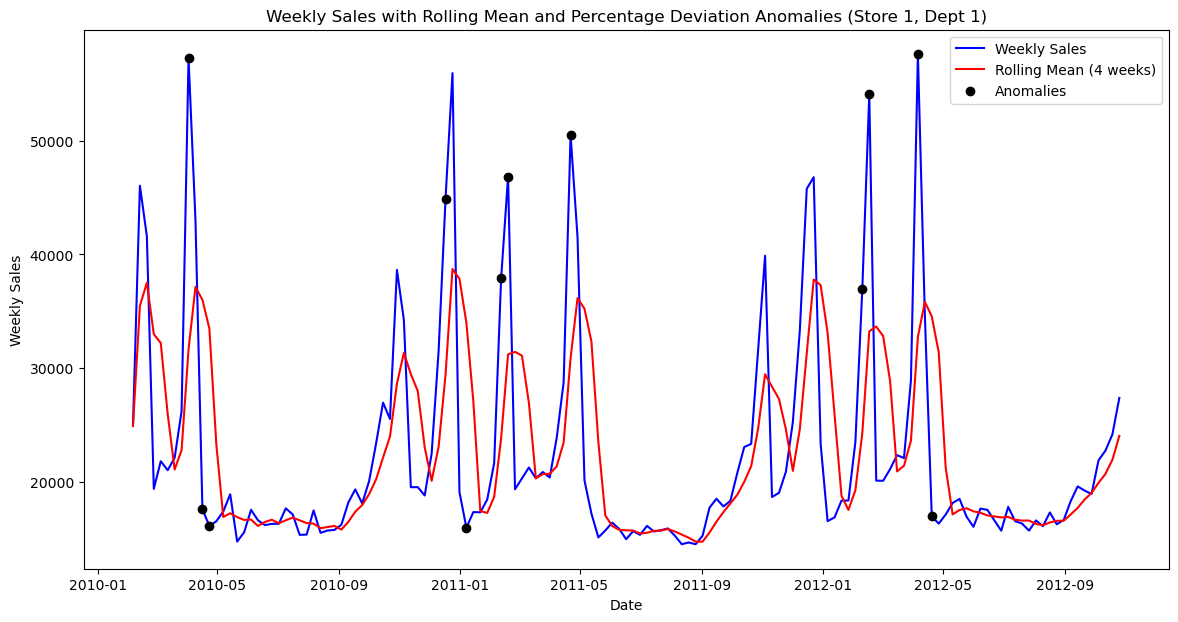

In [38]:
# Visualising anomalies based on percentage deviation for a specific store and department (Store 1, Dept 1).Threshold is set to 50% deviation from the rolling mean.

subset = df[(df["Store"]==1) & (df["Dept"]==1)].copy()

plt.figure(figsize=(14,7))
plt.plot(subset["Date"],subset["Weekly_Sales"], label="Weekly Sales",color='blue')
plt.plot(subset["Date"] , subset["Rolling_Mean_4"] , label = "Rolling Mean (4 weeks)" , color = 'red')

# Highlighting anomalies
subset_anomalies = subset[subset["Pct_Deviation"].abs() > threshold]
plt.scatter(subset_anomalies["Date"] , subset_anomalies["Weekly_Sales"], color='black', label='Anomalies', zorder=5)

plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.title("Weekly Sales with Rolling Mean and Percentage Deviation Anomalies (Store 1, Dept 1)")
plt.legend()
plt.show()


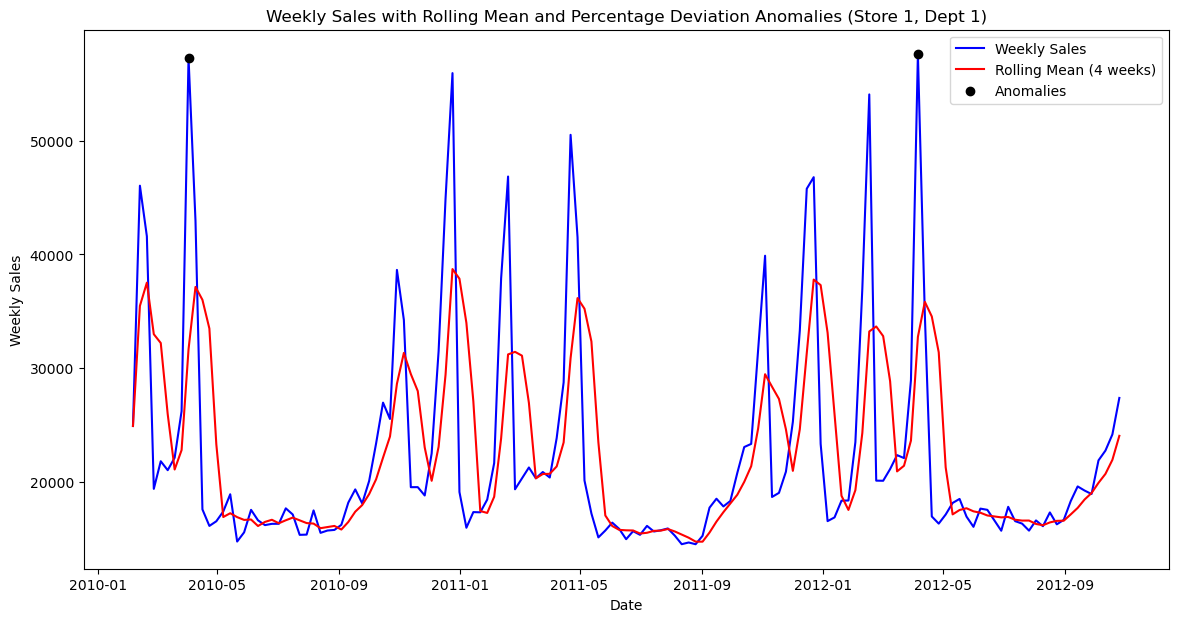

In [39]:
# Visualising anomalies based on percentage deviation for a specific store and department (Store 1, Dept 1).Threshold is set to 70% deviation from the rolling mean.
threshold = 0.7 # 70% deviation from the rolling mean

subset = df[(df["Store"]==1) & (df["Dept"]==1)].copy()

plt.figure(figsize=(14,7))
plt.plot(subset["Date"],subset["Weekly_Sales"], label="Weekly Sales",color='blue')
plt.plot(subset["Date"] , subset["Rolling_Mean_4"] , label = "Rolling Mean (4 weeks)" , color = 'red')

# Highlighting anomalies
subset_anomalies = subset[subset["Pct_Deviation"].abs() > threshold]
plt.scatter(subset_anomalies["Date"] , subset_anomalies["Weekly_Sales"], color='black', label='Anomalies', zorder=5)

plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.title("Weekly Sales with Rolling Mean and Percentage Deviation Anomalies (Store 1, Dept 1)")
plt.legend()
plt.show()


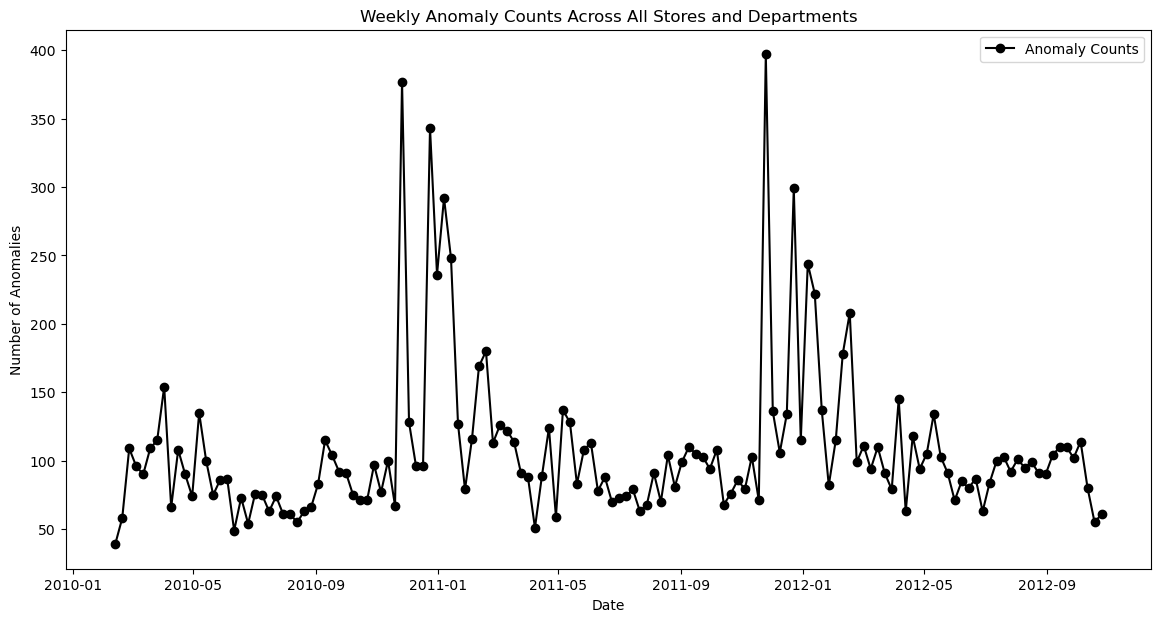

In [40]:
# Count Anomalies per week across all stores and departments 

anomalies_all = df[df["Pct_Deviation"].abs() > threshold]
weekly_counts = anomalies_all.groupby("Date").size()

plt.figure(figsize=(14,7))
plt.plot(weekly_counts.index, weekly_counts.values, marker='o' , color = "black",label='Anomaly Counts')
plt.xlabel("Date")
plt.ylabel("Number of Anomalies")
plt.title("Weekly Anomaly Counts Across All Stores and Departments")
plt.legend()
plt.show()

Number of anomaly weekly sales peaks each year end. It can be seen for 2010 and 2011 especially. For 2012 , there is no data for the last few months of the year.

In [41]:
# Creating a lag1 feature for Weekly Sales
df["Lag_1"] = df.groupby(["Store","Dept"])["Weekly_Sales"].shift(1)
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Has_Markdown,Week,Month,Year,Rolling_Mean_4,Rolling_Std_4,Z_Score,Pct_Deviation,Lag_1
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,0,5,2,2010,24924.500000,0.000000,NaN,0.000000,NaN
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,0,6,2,2010,35481.995000,14930.552614,0.707107,0.297545,24924.50
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,0,7,2,2010,37519.846667,11131.900957,0.366128,0.108628,46039.49
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,0,8,2,2010,32990.770000,12832.106391,-1.058846,-0.411849,41595.55
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,0,9,3,2010,32216.620000,13554.047185,-0.766466,-0.322465,19403.54


In [42]:
# filling the na values in lag1 with weekly sales of that week.Avoiding imputation with median of weekly sales because it introduces future data leakage.

df["Lag_1"] = df["Lag_1"].fillna(df["Weekly_Sales"])

In [43]:
# Encoding categorical variables (Type and IsHoliday)

df["IsHoliday"] = df["IsHoliday"].astype(int)
# ohe for Type 
df = pd.get_dummies(df, columns=["Type"], drop_first=True)

In [44]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Has_Markdown,Week,Month,Year,Rolling_Mean_4,Rolling_Std_4,Z_Score,Pct_Deviation,Lag_1,Type_B,Type_C
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,0,5,2,2010,24924.500000,0.000000,NaN,0.000000,24924.50,False,False
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,151315,0,6,2,2010,35481.995000,14930.552614,0.707107,0.297545,24924.50,False,False
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,151315,0,7,2,2010,37519.846667,11131.900957,0.366128,0.108628,46039.49,False,False
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,151315,0,8,2,2010,32990.770000,12832.106391,-1.058846,-0.411849,41595.55,False,False
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,151315,0,9,3,2010,32216.620000,13554.047185,-0.766466,-0.322465,19403.54,False,False


In [45]:
# save the final feature engineered dataset in parquet format

df.to_parquet("processed_data/final_feature_engineered_retail_data.parquet", index=False)

Statistical deviation measures were explored during EDA to understand sales volatility but final anomaly detection is performed using ML based methods in the next stage.